Compare 2017 Insitu Data from Rich with Model Results

In [1]:
import arrow
import datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

\begin{tabular}{c c l}
Year & Half-height Bloom period & Nominal Level \\ \hline
2003 & 03/25 - 04/25 & 14   \\
2004 & 03/13 - 03/31 & 17 \\
2005 & 02/26 - 03/08 & 36\\ 
2006 & 03/27 - 04/07 & 27\\
2007 & 04/03 - 04/19 & 37\\
2008 & 03/10 - 03/23 & 18\\
2009 & 02/21 - 04/11 & Limits only\\
2010 & 03/18 - 04/01 & 13\\ 
2011 & 04/08 - 05/17 & Limits only\\
2012 & 03/00 - 05/10 & Estimated\\
2013 & 03/26 - 04/20 &  4\\
2014 & 04/01 - 04/21 &  5\\
2015 & 03/06 - 03/16 & 10\\
2016 & 03/19 - 03/29 & 3.5\\ \hline
Mean & 03/18 - 04/04
\end{tabular}

In [2]:
Chldates=[
[2003, 3, 25,   2003, 4, 25,   14],
[2004, 3, 13,   2004, 3, 31,   17],
[2005, 2, 26,   2005, 3, 8,   36],
[2006, 3, 27,   2006, 4, 7,   27],
[2007, 4, 3,   2007, 4, 19,   37*.5],
[2008, 3, 10,   2008, 3, 23,   18*.5],
[2009, 2, 21,   2009, 4, 11,    0*.5],
[2010, 3, 18,   2010, 4, 1,   13*.5],
[2011, 4, 8,   2011, 5, 17,    0*.5],
[2012, 2, 29,   2012, 5, 10,    0*1.5],
[2013, 3, 26,   2013, 4, 20,    4*1.5],
[2014, 4, 1,   2014, 4, 21,    5*1.5],
[2015, 3, 6,   2015, 3, 16,   10*1.5],
[2016, 3, 18,  2016, 3, 29, 3.5*1.5],
[2017, 3, 18,  2017, 3, 28, 12*1.5 ]] 
rich = np.array(Chldates)
length = rich.shape[0]
startdates, enddates = [],[]
for year in Chldates:
    startdates.append(arrow.get(*year[:3]))
    enddates.append(arrow.get(*year[3:6]))

print (enddates[0])

2003-04-25T00:00:00+00:00


In [ ]:
int(arrow.get('2016-02-20').format('DDD'))

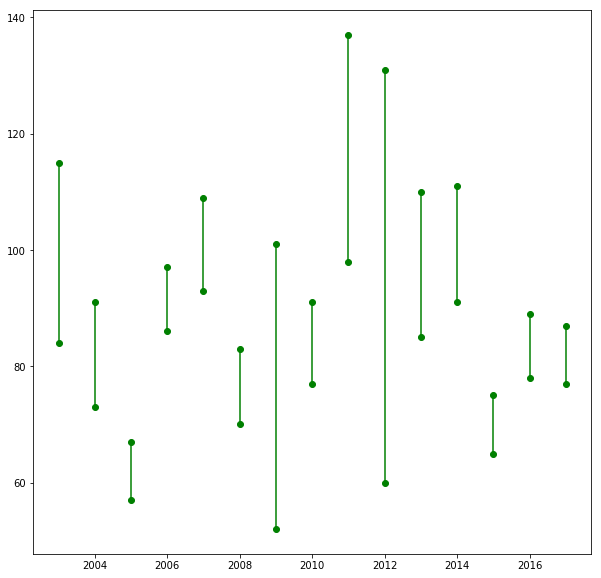

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
for iyear in range(length):
    ax.plot((rich[iyear,0], rich[iyear,0]), 
            (int(startdates[iyear].format('DDD')), int(enddates[iyear].format('DDD'))),'o-g')

In [8]:
Model = np.loadtxt('/ocean/sallen/allen/research/sog/Hindcasts/bloomdates_21mar2018.dat', skiprows=4)
print (Model.shape)
mlength = Model.shape[0]

(51, 2)


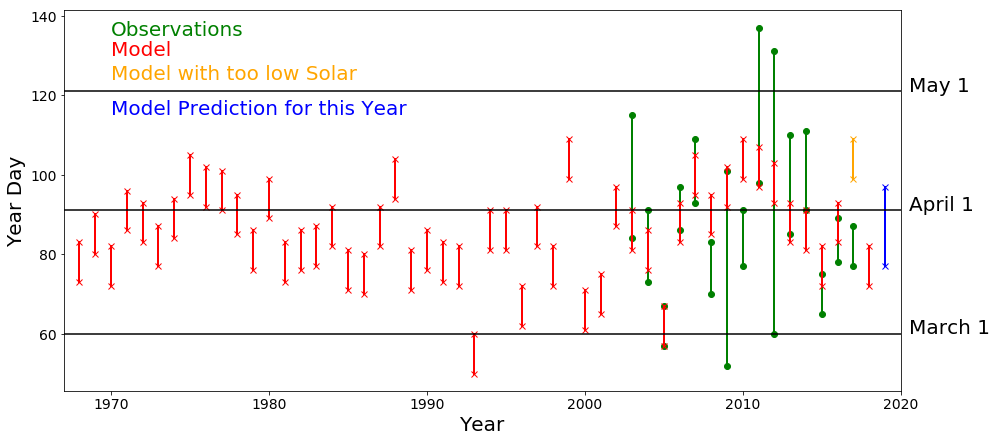

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
for iyear in range(length):
    ax.plot((rich[iyear,0], rich[iyear,0]),            
            (int(startdates[iyear].format('DDD')), int(enddates[iyear].format('DDD'))),'o-g', linewidth=2)
for ii in range(mlength):
    if (Model[ii,0] != 2017):
        ax.plot((Model[ii,0], Model[ii,0]), (Model[ii,1]-5, Model[ii,1]+5), 'x-r', 
                linewidth=2)
    else:
        ax.plot((Model[ii,0], Model[ii,0]), (Model[ii,1]-5, Model[ii,1]+5), 'x-', color='orange', linewidth=2)
ax.plot((2019, 2019), (77, 97), 'x-b', linewidth=2)
tstart = 1967; tend = 2020
ax.set_xlim((tstart, tend))
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
ax.set_ylabel('Year Day', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.text(1970, 135,'Observations', color='g', fontsize=20)
ax.text(1970, 130,'Model', color='r', fontsize=20)
ax.text(1970, 124, 'Model with too low Solar', color='orange', fontsize=20)
ax.text(1970, 115, 'Model Prediction for this Year', color='b', fontsize=20)
ax.plot((tstart, tend), (60,60), 'k')
ax.text(tend+0.5, 60, 'March 1', fontsize=20)
ax.plot((tstart, tend), (91, 91), 'k')
ax.text(tend+0.5, 91, 'April 1', fontsize=20)
ax.plot((tstart, tend), (121, 121), 'k')
ax.text(tend+0.5, 121, 'May 1', fontsize=20);